# 2.2i DR6c Star Catalog Tests  

https://github.com/LSSTDESC/TXPipe/blob/master/txpipe/metacal_gcr_input.py

In [9]:
%matplotlib inline

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import treecorr
from scipy.stats import binned_statistic

In [2]:
star_cat_file = '/global/projecta/projectdirs/lsst/groups/WL/users/zuntz/data/2.2i_dr6/star_catalog.hdf5'

In [4]:
star_cat = h.File(star_cat_file,'r')

In [5]:
for member in star_cat:
    print(member)

provenance
stars


In [6]:
for member in star_cat['stars']:
    print(member)

calib_psf_reserved
calib_psf_used
dec
extendedness
id
mag_g
mag_i
mag_r
mag_u
mag_y
mag_z
measured_T
measured_e1
measured_e2
model_T
model_e1
model_e2
ra
tract


In [13]:
len(star_cat['stars']['mag_i'])

922011

In [15]:
star_cat_df = pd.DataFrame({})
for member in star_cat['stars']:
    star_cat_df[member] = star_cat['stars'][member][()]

In [17]:
star_cat_df = star_cat_df.dropna()

In [18]:
len(star_cat_df['mag_u'])

906228

In [222]:
len(star_cat_df[star_cat_df.extendedness==1])

7961

### Star Size vs. Magnitude

Measured star size. 

No handles with labels found to put in legend.


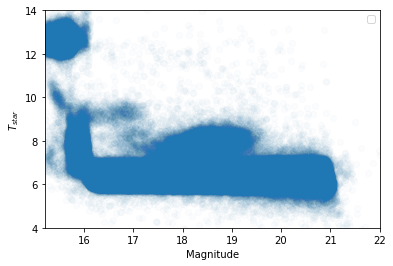

In [245]:
mag = star_cat_df['mag_i']
T_star = star_cat_df['measured_T']

plt.scatter(mag,T_star,alpha=0.02)
plt.ylabel('$T_{star}$')
plt.ylim(4,14)
plt.xlim(15.2,22)
plt.xlabel('Magnitude')
plt.legend(loc='best')

plt.show()

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


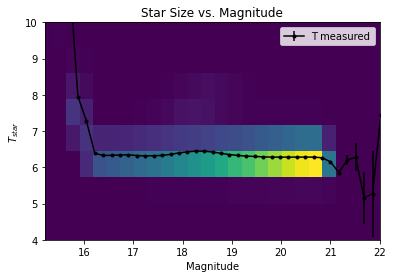

In [153]:
mag = star_cat_df['mag_i']
T_star = star_cat_df['measured_T']

plt.hist2d(mag,T_star,bins=50)
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.ylabel('Size T=Ixx+Iyy')

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',color='black',label='T measured')
plt.ylabel('$T_{star}$')
plt.ylim(4,10)
plt.xlim(15.2,22)
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

plt.show()

Modeled star size.

No handles with labels found to put in legend.


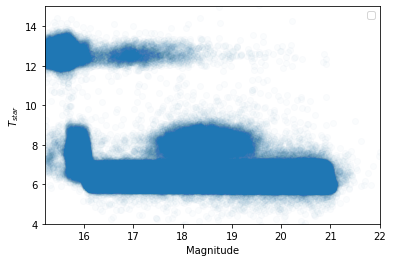

In [209]:
mag = star_cat_df['mag_i']
T_star = star_cat_df['model_T']

plt.scatter(mag,T_star,alpha=0.02)
plt.ylabel('$T_{star}$')
plt.ylim(4,15)
plt.xlim(15.2,22)
plt.xlabel('Magnitude')
plt.legend(loc='best')

plt.show()

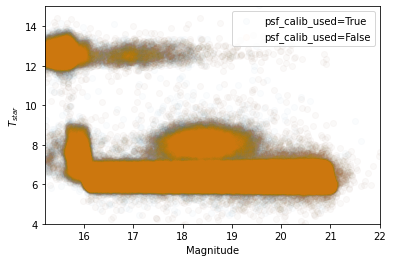

In [211]:
mag = star_cat_df['mag_i'][star_cat_df.calib_psf_used==True]
T_star = star_cat_df['model_T'][star_cat_df.calib_psf_used==True]

plt.scatter(mag,T_star,alpha=0.02,label='psf_calib_used=True')

mag = star_cat_df['mag_i'][star_cat_df.calib_psf_reserved==False]
T_star = star_cat_df['model_T'][star_cat_df.calib_psf_reserved==False]

plt.scatter(mag,T_star,alpha=0.02,label='psf_calib_used=False')
plt.ylabel('$T_{star}$')
plt.ylim(4,15)
plt.xlim(15.2,22)
plt.xlabel('Magnitude')
plt.legend(loc='best')

plt.show()

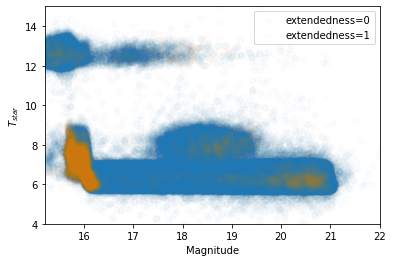

In [223]:
mag = star_cat_df['mag_i'][star_cat_df.extendedness==0]
T_star = star_cat_df['model_T'][star_cat_df.extendedness==0]

plt.scatter(mag,T_star,alpha=0.02,label='extendedness=0')

mag = star_cat_df['mag_i'][star_cat_df.extendedness==1]
T_star = star_cat_df['model_T'][star_cat_df.extendedness==1]

plt.scatter(mag,T_star,alpha=0.02,label='extendedness=1')
plt.ylabel('$T_{star}$')
plt.ylim(4,15)
plt.xlim(15.2,22)
plt.xlabel('Magnitude')
plt.legend(loc='best')

plt.show()

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


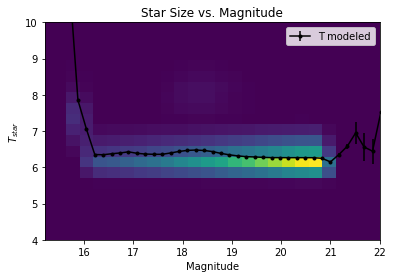

In [207]:
mag = star_cat_df['mag_i']
T_star = star_cat_df['model_T']

plt.hist2d(mag,T_star,bins=50)
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.ylabel('Size T=Ixx+Iyy')

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',color='black',label='T modeled')
plt.ylabel('$T_{star}$')
plt.ylim(4,10)
plt.xlim(15.2,22)
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

plt.show()

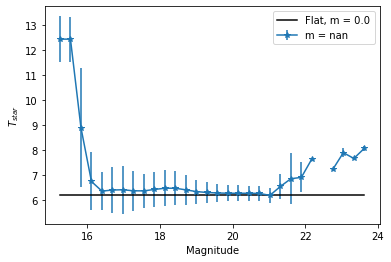

In [208]:
# Quantify how bad the turnup is, look at slope of upturn 

T_star = T_star[mag<24]
mag = mag[mag<24]

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=30, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=30, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=30, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
z = np.polyfit(binned_mag_centers, binned_value, 1)
p = np.poly1d(z)
plt.plot(binned_mag_centers,p(binned_mag_centers),color='black')
 
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error,marker='*',label='m = ' +str(round(z[0],6)))
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.legend(loc='best')


z,zcov = np.polyfit(binned_mag_centers, min(binned_value)*np.ones(len(binned_mag_centers)), 1,cov=True)
p = np.poly1d(z)
plt.plot(binned_mag_centers,min(binned_value)*np.ones(len(binned_mag_centers)),color='black',label='Flat, m = '+str(round(z[0],6)))
plt.legend(loc='best')
plt.show()

Size residuals.

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


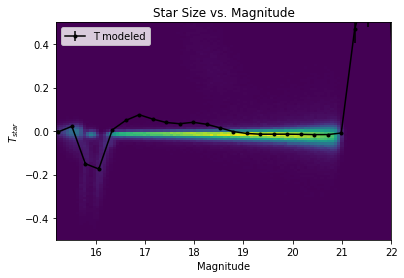

In [204]:
mag = star_cat_df['mag_i']
T_star = star_cat_df['model_T']-star_cat_df['measured_T']

plt.hist2d(mag,T_star,bins=100,range=[(15.2,22),(-0.5,0.5)])
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.ylabel('Size T=Ixx+Iyy')

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=50, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=50, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=50, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',color='black',label='T modeled')
plt.ylabel('$T_{star}$')
plt.xlim(15.2,22)
plt.ylim(-.5,.5)
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

plt.show()

In [240]:
!pwd

/global/cscratch1/sd/elp25/2.2i DR6C 


Recreating TXPipe plot.

In [157]:
def compute_binned_stats(data,band,mmin,mmax):
        # Which band this corresponds to depends on the
        # configuration option chosen
        mag = data['mag_'+band].values
        nbin = 20
        # bin edges in magnitude
        edges = np.linspace(mmin, mmax, nbin+1)
        index = np.digitize(mag, edges)

        # Space for all the output values to go in
        dT = np.zeros(nbin)
        errT = np.zeros(nbin)
        e1 = np.zeros(nbin)
        e2 = np.zeros(nbin)
        err1 = np.zeros(nbin)
        err2 = np.zeros(nbin)
        m = np.zeros(nbin)
        T = np.zeros(nbin)


        for i in range(nbin):
            # Select only objects where everything is finite, as well
            # as only thing in this tomographic bin
            w = np.where((index==i+1) & np.isfinite(data['delta_T'].values) & np.isfinite(data['delta_e1'].values) & np.isfinite(data['delta_e2'].values) )
            # x-value = mean mag
            m[i] = mag[w].mean()
            # y values
            dT_i = data['delta_T'].values[w]
            e1_i = data['delta_e1'].values[w]
            e2_i = data['delta_e2'].values[w]
            T_i = data['measured_T'].values[w]
            # Mean and error on mean of each of these quantities
            dT[i] = dT_i.mean()
            errT[i] = dT_i.std() / np.sqrt(dT_i.size)
            e1[i] = e1_i.mean()
            err1[i] = e1_i.std() / np.sqrt(e1_i.size)
            e2[i] = e2_i.mean()
            T[i] = T_i.mean()
            err2[i] = e2_i.std() / np.sqrt(e2_i.size)
        return m, dT, T, errT, e1, err1, e2, err2

In [158]:
star_cat_df['delta_T'] = star_cat_df['measured_T'] - star_cat_df['model_T']
star_cat_df['delta_e1'] = star_cat_df['measured_e1'] - star_cat_df['model_e1']
star_cat_df['delta_e2'] = star_cat_df['measured_e2'] - star_cat_df['model_e2']

In [159]:
band = 'r'
m, dT, T, errT, e1, err1, e2, err2 = compute_binned_stats(star_cat_df,'r',18,23.5)

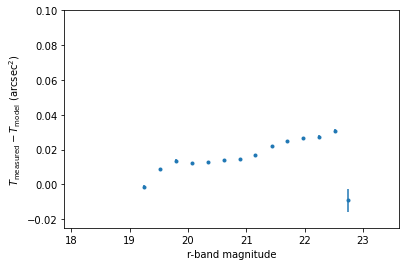

In [160]:
plt.errorbar(m, dT, errT, fmt='.')
plt.xlabel(f"{band}-band magnitude")
plt.ylabel(r"$T_\mathrm{measured} - T_\mathrm{model}$ ($\mathrm{arcsec}^2$)")
plt.ylim(-0.025, 0.1)
plt.show()

In [238]:
band = 'i'
m, dT, T, errT, e1, err1, e2, err2 = compute_binned_stats(star_cat_df,'i',15,21)

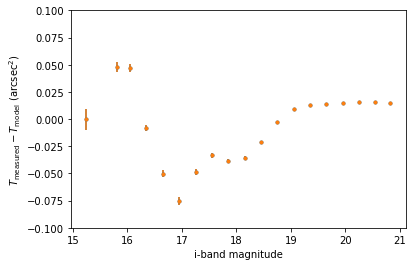

In [244]:
plt.errorbar(m, dT, errT, fmt='.')
band = 'i'
cut = star_cat_df.measured_T<10
m, dT, T, errT, e1, err1, e2, err2 = compute_binned_stats(star_cat_df[cut],'i',15,21)
plt.errorbar(m, dT, errT, fmt='.')
plt.xlabel(f"{band}-band magnitude")
plt.ylabel(r"$T_\mathrm{measured} - T_\mathrm{model}$ ($\mathrm{arcsec}^2$)")
plt.ylim(-0.1, 0.1)
plt.show()

Compare to HSC plot
fractional residual = (size_psf - size_star) / size_star

https://arxiv.org/pdf/1705.06745.pdf

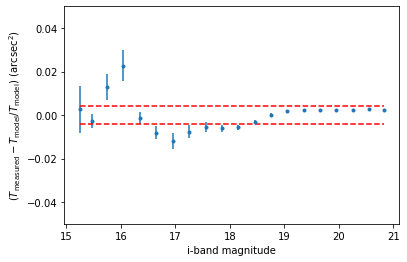

In [163]:
plt.errorbar(m, dT/T, errT, fmt='.')
plt.plot(m,len(m)*[0.004],color='red',linestyle='--')
plt.plot(m,len(m)*[-0.004],color='red',linestyle='--')
plt.xlabel(f"{band}-band magnitude")
plt.ylabel(r"$(T_\mathrm{measured} - T_\mathrm{model}/T_\mathrm{model})$ ($\mathrm{arcsec}^2$)")
plt.ylim(-0.05, 0.05)
plt.show()

How does i look without the outlier objects? 

In [235]:
len(star_cat_df[cut])

863684

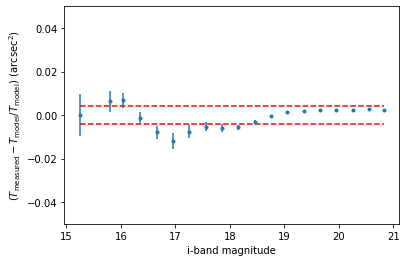

In [236]:
band = 'i'
cut = star_cat_df.measured_T<10
m, dT, T, errT, e1, err1, e2, err2 = compute_binned_stats(star_cat_df[cut],'i',15,21)
plt.errorbar(m, dT/T, errT, fmt='.')
plt.plot(m,len(m)*[0.004],color='red',linestyle='--')
plt.plot(m,len(m)*[-0.004],color='red',linestyle='--')
plt.xlabel(f"{band}-band magnitude")
plt.ylabel(r"$(T_\mathrm{measured} - T_\mathrm{model}/T_\mathrm{model})$ ($\mathrm{arcsec}^2$)")
plt.ylim(-0.05, 0.05)
plt.show()

Ellipticities.

(-0.002, 0.002)

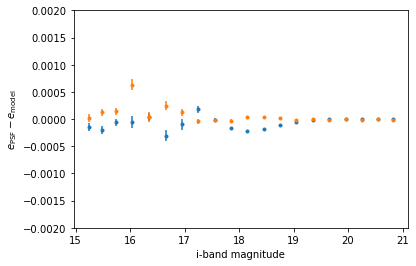

In [164]:
plt.errorbar(m, e1, err1, label='$e_1$', fmt='.')
plt.errorbar(m, e2, err2, label='$e_2$', fmt='.')
plt.ylabel(r"$e_\mathrm{PSF} - e_\mathrm{model}$")
plt.xlabel(f"{band}-band magnitude")
# May need to adjust this range
plt.ylim(-0.002, 0.002)

**Conclusion** The PSF model is measured on bright stars, which makes the model greater than the average over all brightnesses. So for bright stars it should correct well, and for dimmer stars it should overpredict the size. So these tests show there is residual brighter-fatter.

https://docs.google.com/presentation/d/1lV8PIkoADUEKMjjn7tk5C3Xd_odncRfnMLmTL0Xj1BU/edit#slide=id.g574b7a4546_0_20

In [192]:
np.unique(star_cat_df['tract'])

array([2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906,
       2907, 2908, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082,
       3083, 3084, 3085, 3086, 3256, 3257, 3258, 3259, 3260, 3261, 3262,
       3263, 3264, 3265, 3266, 3267, 3268, 3441, 3442, 3443, 3444, 3445,
       3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3631, 3632,
       3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643,
       3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835,
       3836, 3837, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030,
       4031, 4032, 4033, 4034, 4035, 4224, 4225, 4226, 4227, 4228, 4229,
       4230, 4231, 4232, 4233, 4234, 4235, 4236, 4429, 4430, 4431, 4432,
       4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4636, 4637,
       4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648,
       4851, 4852, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 5065,
       5066, 5067, 5068, 5069, 5070, 5071, 5072, 50

In [193]:
star_cat_df_tract = star_cat_df[star_cat_df.tract==5066]

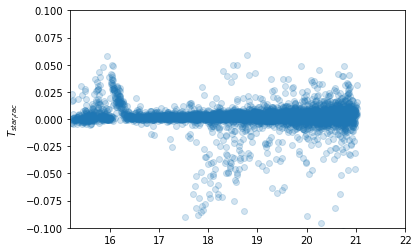

In [194]:
mag = star_cat_df_tract['mag_i']
T_star = (star_cat_df_tract['measured_T']-star_cat_df_tract['model_T'])/star_cat_df_tract['measured_T']

plt.scatter(mag,T_star,alpha=0.2)
plt.ylabel('$T_{star_frac}$')
plt.ylim(-0.1,0.1)
plt.xlim(15.2,22)

plt.show()

In [212]:
star_cat_df_tract = star_cat_df[star_cat_df.tract==4026]

Hmm what are those outlier objects? 

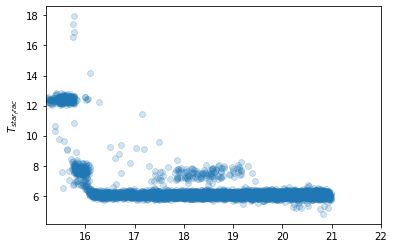

In [217]:
mag = star_cat_df_tract['mag_i']
T_star = star_cat_df_tract['measured_T']

plt.scatter(mag,T_star,alpha=0.2)
plt.ylabel('$T_{star_frac}$')
#plt.ylim(-0.1,0.1)
plt.xlim(15.2,22)

plt.show()

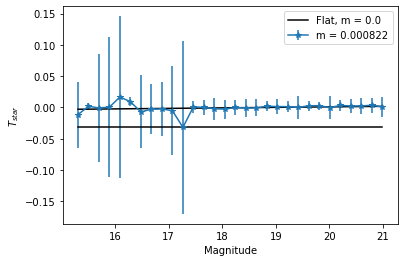

In [195]:
# Quantify how bad the turnup is, look at slope of upturn 

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=30, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=30, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=30, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
z = np.polyfit(binned_mag_centers, binned_value, 1)
p = np.poly1d(z)
plt.plot(binned_mag_centers,p(binned_mag_centers),color='black')
 
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error,marker='*',label='m = ' +str(round(z[0],6)))
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.legend(loc='best')


z,zcov = np.polyfit(binned_mag_centers, min(binned_value)*np.ones(len(binned_mag_centers)), 1,cov=True)
p = np.poly1d(z)
plt.plot(binned_mag_centers,min(binned_value)*np.ones(len(binned_mag_centers)),color='black',label='Flat, m = '+str(round(z[0],6)))
plt.legend(loc='best')
plt.show()

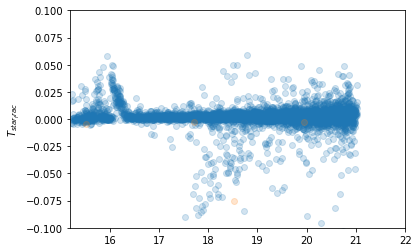

In [196]:
star_cat_df_tract_used = star_cat_df[(star_cat_df.tract==5066)&(star_cat_df.calib_psf_used==True)]
star_cat_df_tract_unused = star_cat_df[(star_cat_df.tract==5066)&(star_cat_df.calib_psf_used==False)]
mag_used = star_cat_df_tract_used['mag_i']
T_star_used = (star_cat_df_tract_used['measured_T']-star_cat_df_tract_used['model_T'])/star_cat_df_tract_used['measured_T']

mag_unused = star_cat_df_tract_unused['mag_i']
T_star_unused = (star_cat_df_tract_unused['measured_T']-star_cat_df_tract_unused['model_T'])/star_cat_df_tract_unused['measured_T']

plt.scatter(mag_used,T_star_used,alpha=0.2)
plt.scatter(mag_unused,T_star_unused,alpha=0.2)
plt.ylabel('$T_{star_frac}$')
plt.ylim(-0.1,0.1)
plt.xlim(15.2,22)

plt.show()

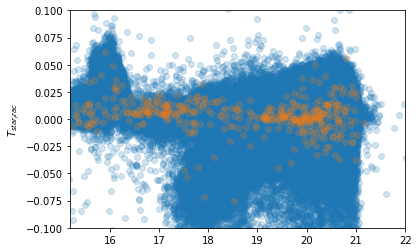

In [197]:
star_cat_df_tract_used = star_cat_df[(star_cat_df.calib_psf_used==True)]
star_cat_df_tract_unused = star_cat_df[(star_cat_df.calib_psf_used==False)]
mag_used = star_cat_df_tract_used['mag_i']
T_star_used = (star_cat_df_tract_used['measured_T']-star_cat_df_tract_used['model_T'])/star_cat_df_tract_used['measured_T']

mag_unused = star_cat_df_tract_unused['mag_i']
T_star_unused = (star_cat_df_tract_unused['measured_T']-star_cat_df_tract_unused['model_T'])/star_cat_df_tract_unused['measured_T']

plt.scatter(mag_used,T_star_used,alpha=0.2)
plt.scatter(mag_unused,T_star_unused,alpha=0.2)
plt.ylabel('$T_{star_frac}$')
plt.ylim(-0.1,0.1)
plt.xlim(15.2,22)

plt.show()

## Reserved Stars Histograms

In [247]:
reserved_star_cat_df = star_cat_df[star_cat_df.calib_psf_reserved==True]

In [248]:
reserved_star_cat_df.columns

Index(['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'id',
       'mag_g', 'mag_i', 'mag_r', 'mag_u', 'mag_y', 'mag_z', 'measured_T',
       'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra',
       'tract', 'delta_T', 'delta_e1', 'delta_e2'],
      dtype='object')

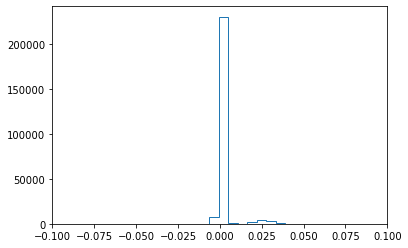

In [256]:
plt.hist(reserved_star_cat_df['measured_e1'],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

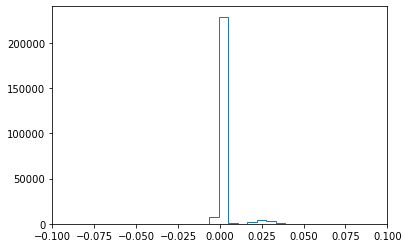

In [260]:
extendedness_cut = reserved_star_cat_df.extendedness==0
plt.hist(reserved_star_cat_df['measured_e1'][extendedness_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

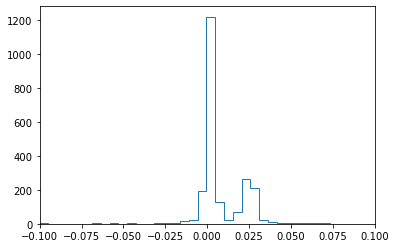

In [259]:
extendedness_cut = reserved_star_cat_df.extendedness==1
plt.hist(reserved_star_cat_df['measured_e1'][extendedness_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

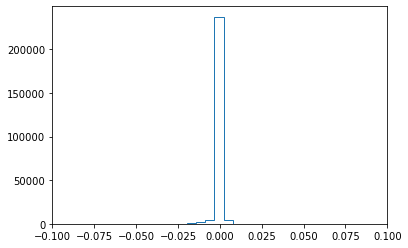

In [261]:
plt.hist(reserved_star_cat_df['measured_e2'],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

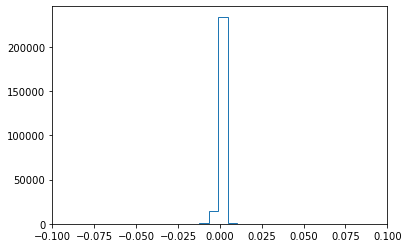

In [264]:
plt.hist(reserved_star_cat_df['measured_e1']-reserved_star_cat_df['model_e1'],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

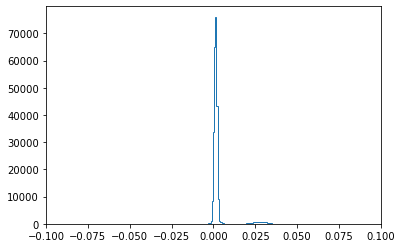

In [265]:
plt.hist(reserved_star_cat_df['model_e1'],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

Are these maybe the large objects? 

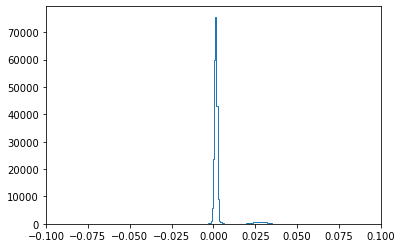

In [266]:
size_cut = reserved_star_cat_df['measured_T']<10
plt.hist(reserved_star_cat_df['model_e1'][size_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

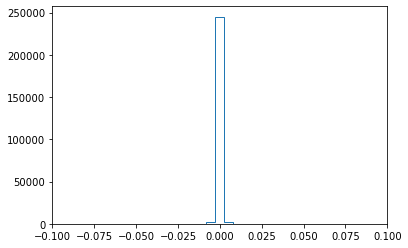

In [268]:
plt.hist(reserved_star_cat_df['measured_e2']-reserved_star_cat_df['model_e2'],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

## Used Star Histograms

In [270]:
used_star_cat_df = star_cat_df[star_cat_df.calib_psf_used==True]

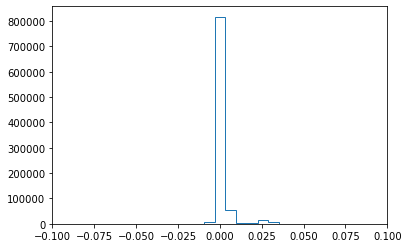

In [271]:
plt.hist(used_star_cat_df['measured_e1'],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

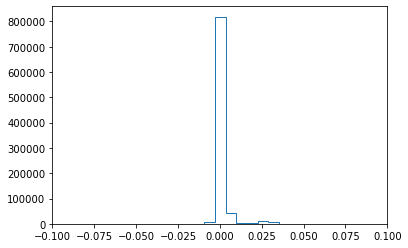

In [272]:
extendedness_cut = used_star_cat_df.extendedness==0
plt.hist(used_star_cat_df['measured_e1'][extendedness_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

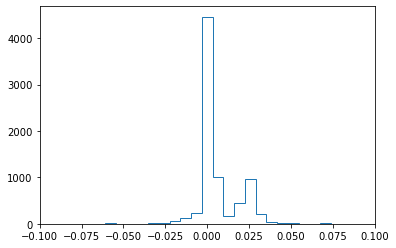

In [273]:
extendedness_cut = used_star_cat_df.extendedness==1
plt.hist(used_star_cat_df['measured_e1'][extendedness_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

Are they only bright galaxies? 

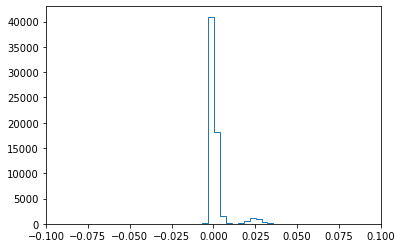

In [282]:
mag_cut = used_star_cat_df.mag_i<16
plt.hist(used_star_cat_df['measured_e1'][mag_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

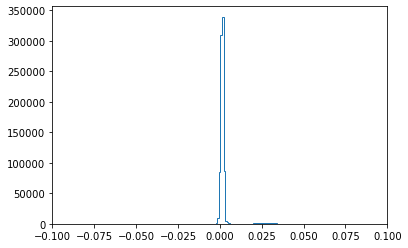

In [276]:
size_cut = used_star_cat_df['measured_T']<10
plt.hist(used_star_cat_df['model_e1'][size_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

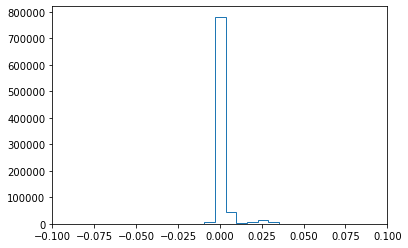

In [277]:
size_cut = used_star_cat_df['measured_T']<10
plt.hist(used_star_cat_df['measured_e1'][size_cut],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()

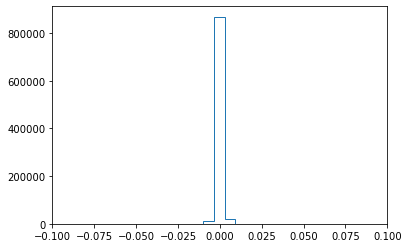

In [280]:
plt.hist(used_star_cat_df['measured_e1']-used_star_cat_df['model_e1'],bins=100,histtype='step')
plt.xlim(-0.1,0.1)
plt.show()